# Homework 5


Apply the EDA techniques we learnt today to `flights` dataset and write a short report.

In [118]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv'
flights = pd.read_csv(url)

In [119]:
flights.shape

(336776, 19)

In [120]:
flights.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

In [121]:
flights.head(10).T

0                     1  \
year                            2013                  2013   
month                              1                     1   
day                                1                     1   
dep_time                       517.0                 533.0   
sched_dep_time                   515                   529   
dep_delay                        2.0                   4.0   
arr_time                       830.0                 850.0   
sched_arr_time                   819                   830   
arr_delay                       11.0                  20.0   
carrier                           UA                    UA   
flight                          1545                  1714   
tailnum                       N14228                N24211   
origin                           EWR                   LGA   
dest                             IAH                   IAH   
air_time                       227.0                 227.0   
distance                        1400                  1416   
hour                               5                     5   
minute                            15                    29   
time_hour       2013-01-01T10:00:00Z  2013-01-01T10:00:00Z   

                                   2                     3  \
year                            2013                  2013   
month                              1                     1   
day                                1                     1   
dep_time                       542.0                 544.0   
sched_dep_time                   540                   545   
dep_delay                        2.0                  -1.0   
arr_time                       923.0                1004.0   
sched_arr_time                   850                  1022   
arr_delay                       33.0                 -18.0   
carrier                           AA                    B6   
flight                          1141                   725   
tailnum                       N619AA                N804JB   
origin                           JFK                   JFK   
dest                             MIA                   BQN   
air_time                       160.0                 183.0   
distance                        1089                  1576   
hour                               5                     5   
minute                            40                    45   
time_hour       2013-01-01T10:00:00Z  2013-01-01T10:00:00Z   

                                   4                     5  \
year                            2013                  2013   
month                              1                     1   
day                                1                     1   
dep_time                       554.0                 554.0   
sched_dep_time                   600                   558   
dep_delay                       -6.0                  -4.0   
arr_time                       812.0                 740.0   
sched_arr_time                   837                   728   
arr_delay                      -25.0                  12.0   
carrier                           DL                    UA   
flight                           461                  1696   
tailnum                       N668DN                N39463   
origin                           LGA                   EWR   
dest                             ATL                   ORD   
air_time                       116.0                 150.0   
distance                         762                   719   
hour                               6                     5   
minute                             0                    58   
time_hour       2013-01-01T11:00:00Z  2013-01-01T10:00:00Z   

                                   6                     7  \
year                            2013                  2013   
month                              1                     1   
day                                1                     1   
dep_time                       555.0                 557.0   
sc

In [122]:
flights.describe()

year          month            day       dep_time  sched_dep_time  \
count  336776.0  336776.000000  336776.000000  328521.000000   336776.000000   
mean     2013.0       6.548510      15.710787    1349.109947     1344.254840   
std         0.0       3.414457       8.768607     488.281791      467.335756   
min      2013.0       1.000000       1.000000       1.000000      106.000000   
25%      2013.0       4.000000       8.000000     907.000000      906.000000   
50%      2013.0       7.000000      16.000000    1401.000000     1359.000000   
75%      2013.0      10.000000      23.000000    1744.000000     1729.000000   
max      2013.0      12.000000      31.000000    2400.000000     2359.000000   

           dep_delay       arr_time  sched_arr_time      arr_delay  \
count  328521.000000  328063.000000   336776.000000  327346.000000   
mean       12.639070    1502.054999     1536.380220       6.895377   
std        40.210061     533.264132      497.457142      44.633292   
min       -43.000000       1.000000        1.000000     -86.000000   
25%        -5.000000    1104.000000     1124.000000     -17.000000   
50%        -2.000000    1535.000000     1556.000000      -5.000000   
75%        11.000000    1940.000000     1945.000000      14.000000   
max      1301.000000    2400.000000     2359.000000    1272.000000   

              flight       air_time       distance           hour  \
count  336776.000000  327346.000000  336776.000000  336776.000000   
mean     1971.923620     150.686460    1039.912604      13.180247   
std      1632.471938      93.688305     733.233033       4.661316   
min         1.000000      20.000000      17.000000       1.000000   
25%       553.000000      82.000000     502.000000       9.000000   
50%      1496.000000     129.000000     872.000000      13.000000   
75%      3465.000000     192.000000    1389.000000      17.000000   
max      8500.000000     695.000000    4983.000000      23.000000   

              minute  
count  336776.000000  
mean       26.230100  
std        19.300846  
min         0.000000  
25%         8.000000  
50%        29.000000  
75%        44.000000  
max        59.000000

In [123]:
flights.describe(include='object')

carrier tailnum  origin    dest             time_hour
count   336776  334264  336776  336776                336776
unique      16    4043       3     105                  6936
top         UA  N725MQ     EWR     ORD  2013-09-13T12:00:00Z
freq     58665     575  120835   17283                    94

In [124]:
def uniq_per_col(flights,count):
    for this_column in flights.columns:
        print("\n==== ",this_column,"has",flights[this_column].nunique(),"unique entries ====")
        print(flights[this_column].value_counts().head(count))

In [125]:
uniq_per_col(flights,3)


====  year has 1 unique entries ====
2013    336776
Name: year, dtype: int64

====  month has 12 unique entries ====
7     29425
8     29327
10    28889
Name: month, dtype: int64

====  day has 31 unique entries ====
18    11399
11    11359
22    11345
Name: day, dtype: int64

====  dep_time has 1318 unique entries ====
555.0    834
755.0    820
556.0    818
Name: dep_time, dtype: int64

====  sched_dep_time has 1021 unique entries ====
600    7016
700    4900
630    4770
Name: sched_dep_time, dtype: int64

====  dep_delay has 527 unique entries ====
-5.0    24821
-4.0    24619
-3.0    24218
Name: dep_delay, dtype: int64

====  arr_time has 1411 unique entries ====
1008.0    485
1013.0    484
1015.0    479
Name: arr_time, dtype: int64

====  sched_arr_time has 1163 unique entries ====
1025    1324
2015    1234
1110    1198
Name: sched_arr_time, dtype: int64

====  arr_delay has 577 unique entries ====
-13.0    7177
-10.0    7088
-12.0    7046
Name: arr_delay, dtype: int64

====  carri

In [126]:
carrier = flights.carrier.value_counts()
carrier

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

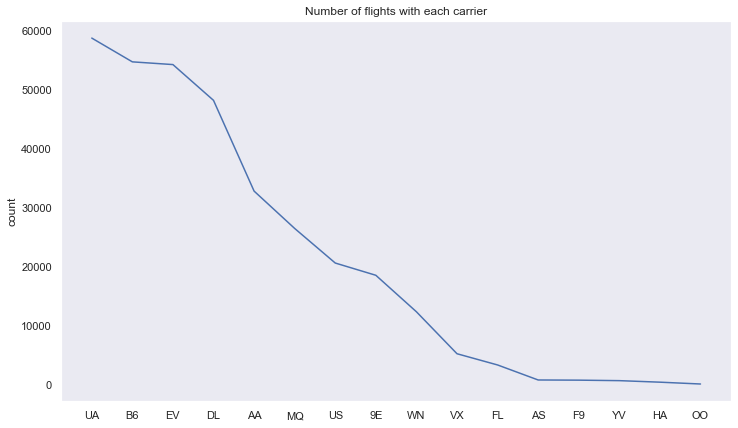

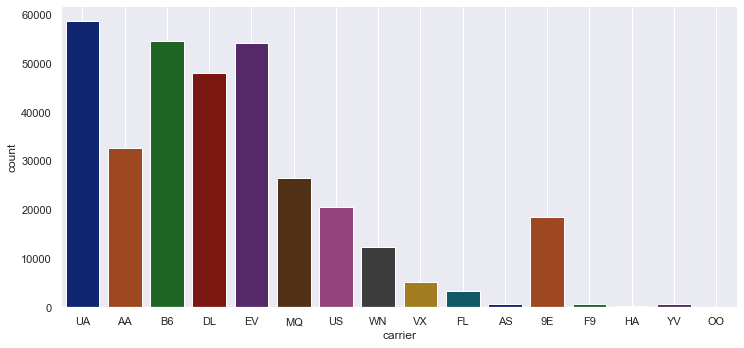

In [127]:
plt.title("Number of flights with each carrier")
plt.ylabel("count")
sns.lineplot(data = carrier, markers=True, dashes= True)
plt.grid()
sns.catplot(data= flights, kind = 'count', x = 'carrier', height=5, aspect=2.1,palette='dark')
plt.grid()
plt.show()

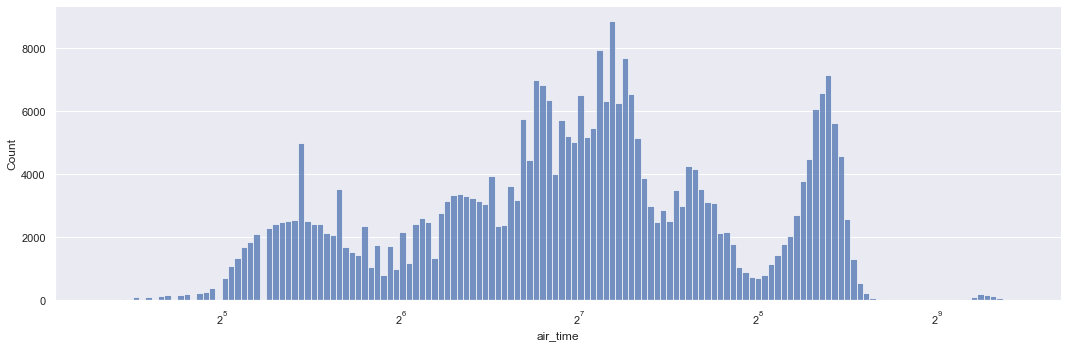

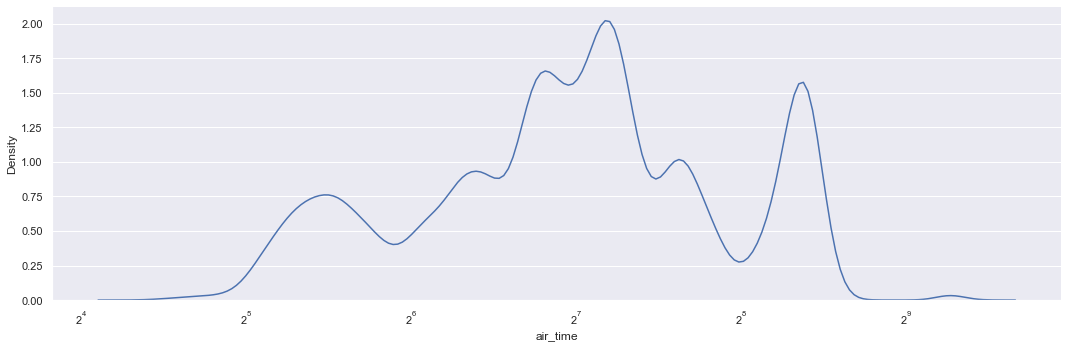

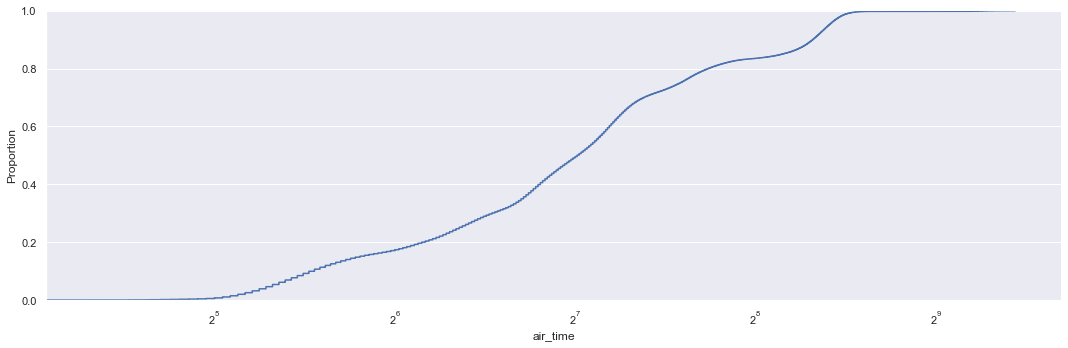

In [128]:
sns.set_style('darkgrid')

#displot to see the distribution of 'air_time' column.
plot = sns.displot(data = flights, x= 'air_time', kind = 'hist',log_scale = 2, height=5 ,aspect=3)
plot.ax.grid(axis = 'x')

## or we can just take a look at the densities
plot = sns.displot(data = flights, x= 'air_time', kind = 'kde',log_scale = 2, height= 5, aspect = 3)

## note that we can add a grid also
plot.ax.grid(axis = 'x')

plot = sns.displot(data = flights, x= 'air_time', kind = 'ecdf',log_scale = 2, height= 5, aspect = 3)
plot.ax.grid(axis = 'x')
 

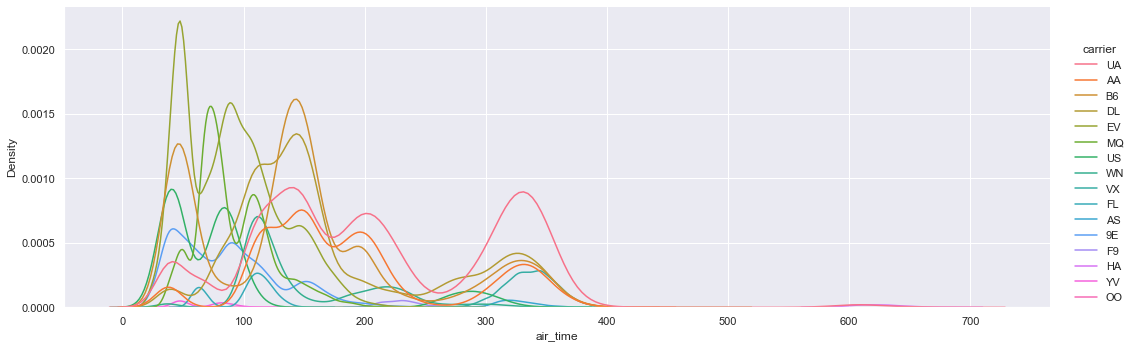

In [129]:
plot= sns.displot(data=flights, kind="kde", x="air_time", hue = 'carrier', aspect=3, alpha=1)

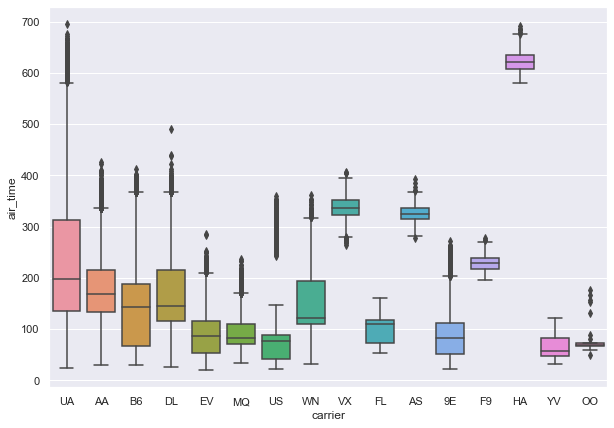

In [131]:
plt.figure(figsize=(10,7))
plot = sns.boxplot(x = 'carrier', y = 'air_time', data = flights )
plt.show()

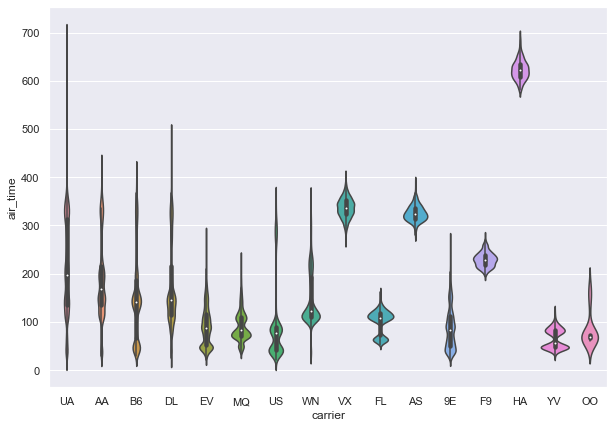

In [132]:
plt.figure(figsize=(10,7))
sns.violinplot(x = 'carrier', y = 'air_time', data = flights )
plt.show()

<Figure size 720x7200 with 0 Axes>

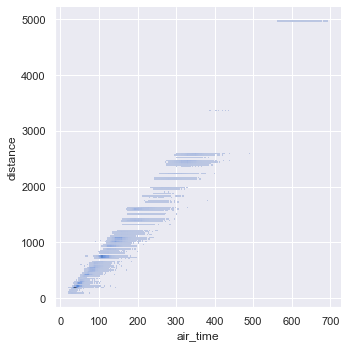

In [137]:
sns.displot(data = flights, x="air_time", y="distance")

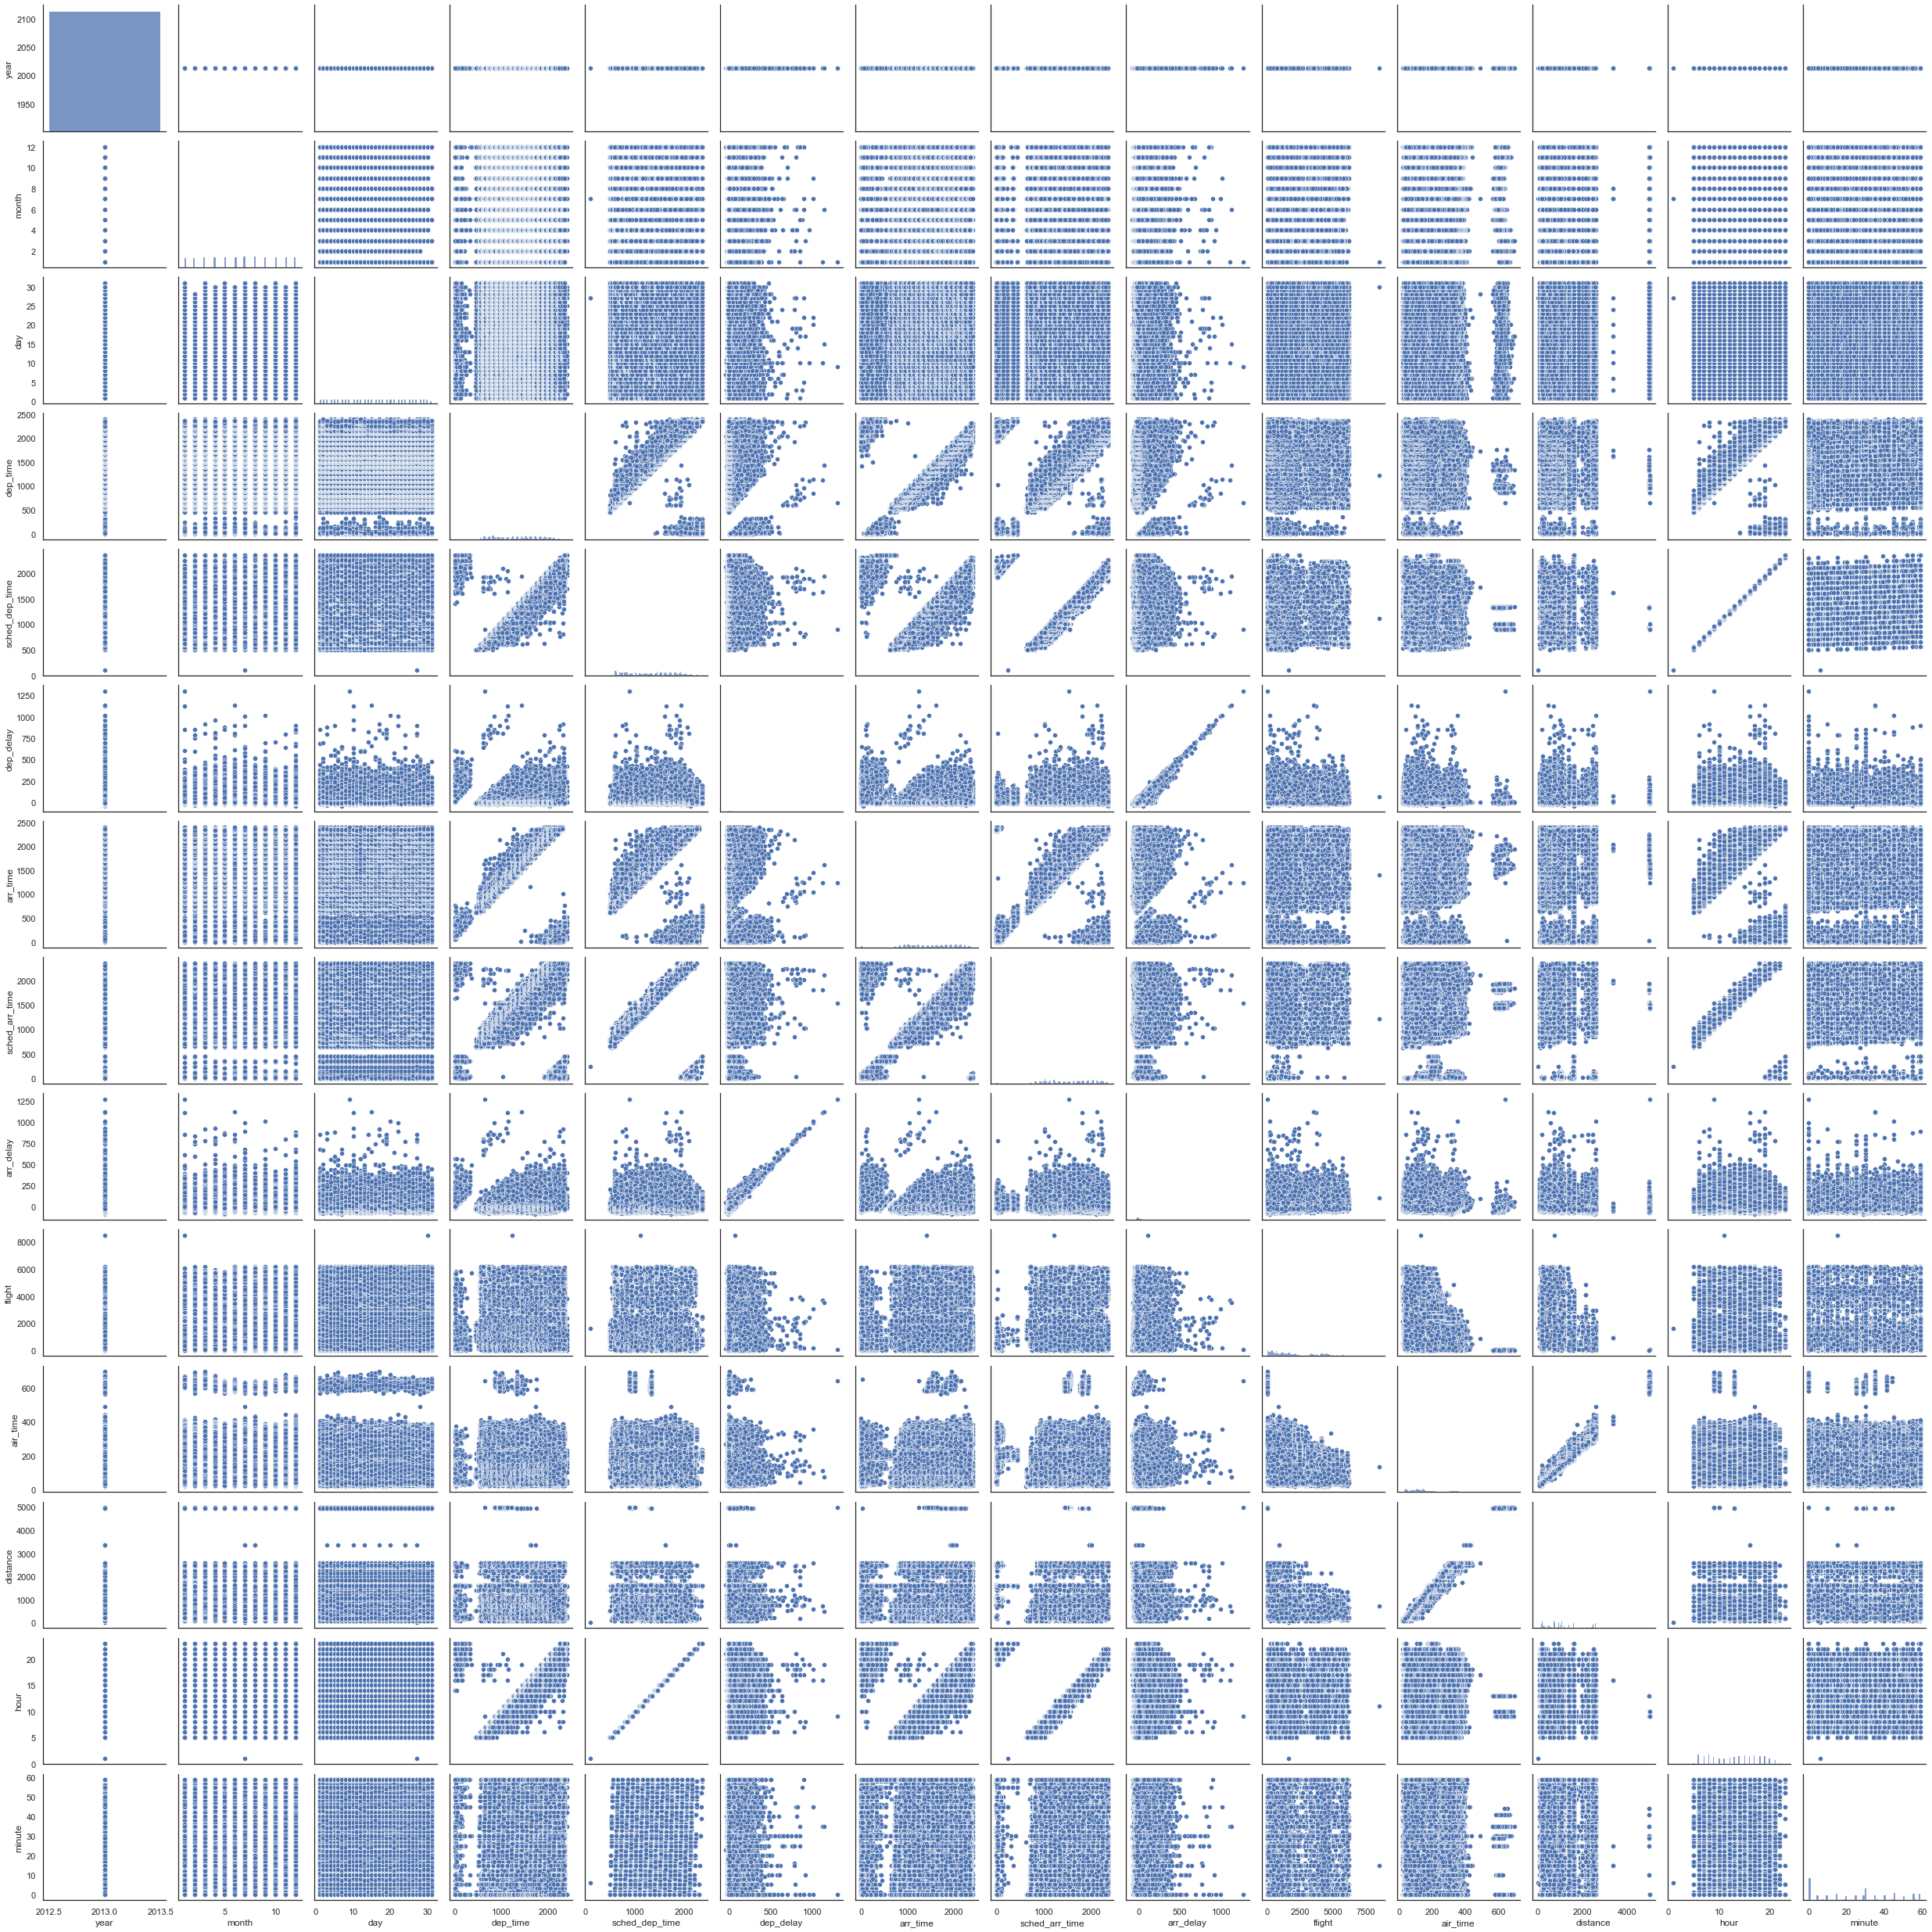

In [102]:
sns.pairplot(flights)

In [71]:
flights_copy = flights

In [68]:
import missingno as msno

<AxesSubplot:>

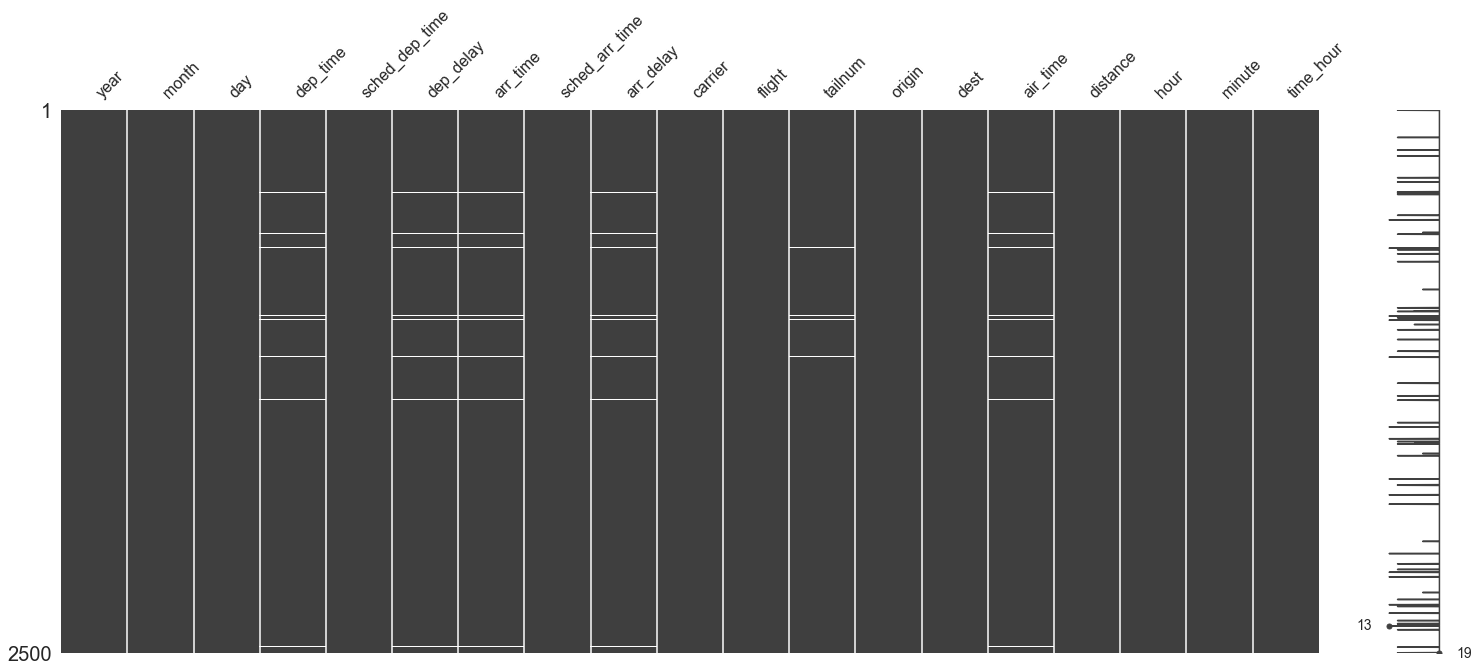

In [72]:
msno.matrix(flights_copy.sample(2500)) #visualising null values in the dataset

In [44]:
flights_copy.isna().sum() #number of null values in each column

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [73]:
#replacing the null values with the mean value of the column

flights_copy['dep_time'].fillna((flights_copy['dep_time'].mean()), inplace=True)
flights_copy['dep_delay'].fillna((flights_copy['dep_delay'].mean()), inplace=True)
flights_copy['arr_time'].fillna((flights_copy['arr_time'].mean()), inplace=True)
flights_copy['arr_delay'].fillna((flights_copy['arr_delay'].mean()), inplace=True)
flights_copy['air_time'].fillna((flights_copy['air_time'].mean()), inplace=True)

flights_copy.isna().sum()

year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

<AxesSubplot:>

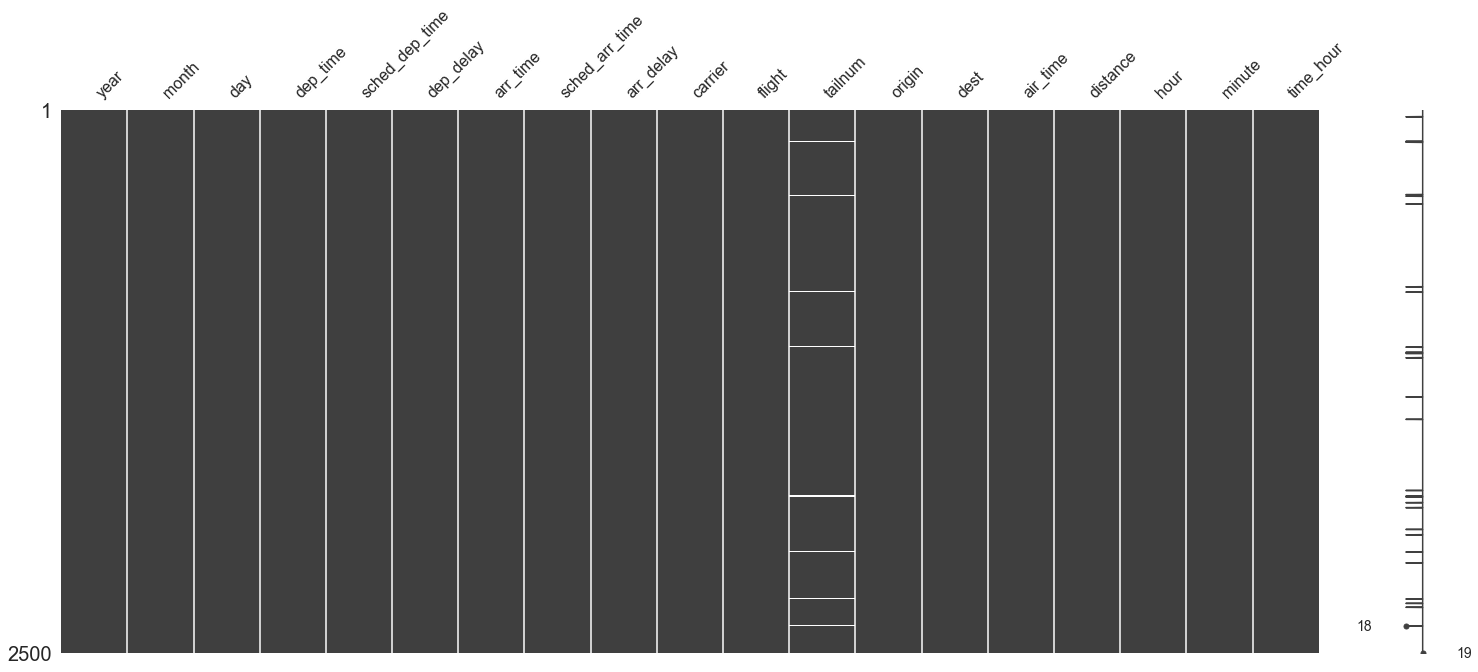

In [74]:
msno.matrix(flights.sample(2500)) #visualising after filling the null values